# Seaborn: distplot

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from ipywidgets import interactive

import warnings
warnings.filterwarnings("ignore")

In [2]:
cars = sns.load_dataset('mpg').dropna()
cars.shape

(392, 9)

In [3]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
sns.set_style('white')

## Intro Visuals

In [5]:
hp = cars.horsepower.sample(100, random_state=100)

In [6]:
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

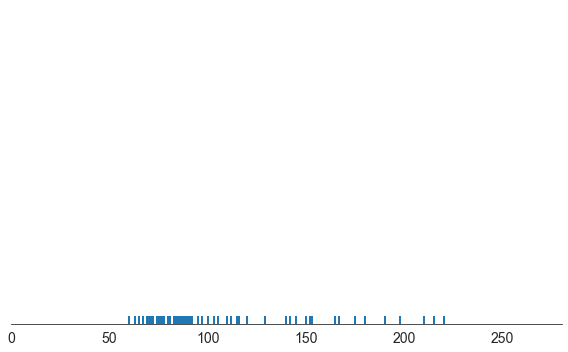

In [7]:
plt.figure(figsize=(8,5))
sns.distplot(hp, rug=True, kde=False, hist=False, rug_kws={'lw': 2})

sns.despine(left=True)
plt.xlim(0, 280)
plt.xlabel('')
plt.yticks([])
plt.tight_layout();

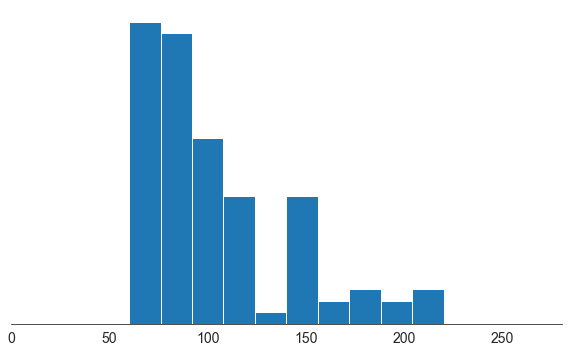

In [8]:
plt.figure(figsize=(8,5))
sns.distplot(hp, kde=False, hist_kws={'alpha': 1})

sns.despine(left=True)
plt.xlim(0, 280)
plt.xlabel('')
plt.yticks([])
plt.tight_layout();

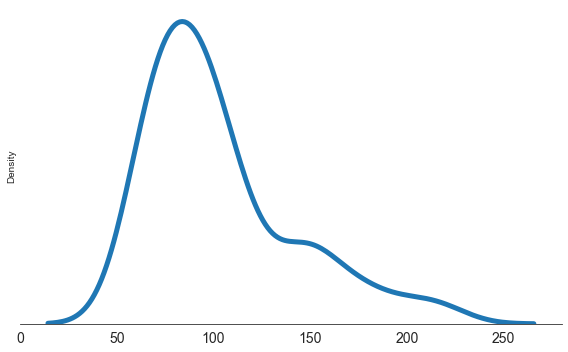

In [9]:
plt.figure(figsize=(8,5))
sns.distplot(hp, hist=False, kde_kws={'lw': 5})

sns.despine(left=True)
plt.xlim(0, 280)
plt.xlabel('')
plt.yticks([])
plt.tight_layout();

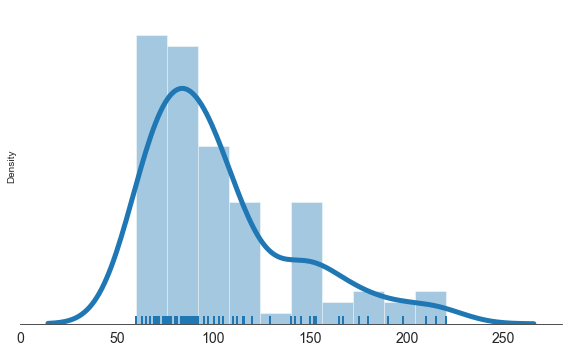

In [10]:
plt.figure(figsize=(8,5))
sns.distplot(hp, rug=True, kde_kws={"lw": 5}, rug_kws={'lw': 2} )

sns.despine(left=True)
plt.xlim(0, 280)
plt.xlabel('')
plt.yticks([])
plt.tight_layout();

## Basics

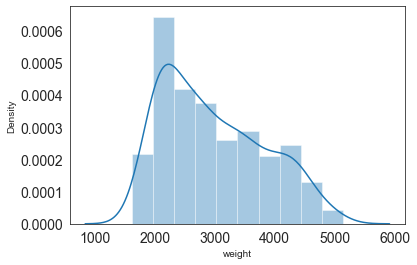

In [11]:
sns.distplot(cars.weight);

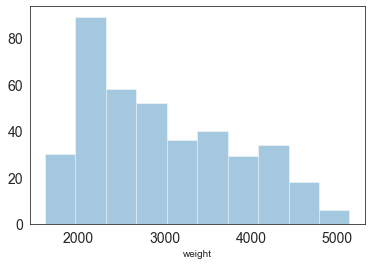

In [12]:
sns.distplot(cars.weight, kde=False);

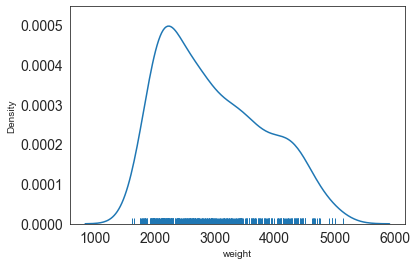

In [13]:
sns.distplot(cars.weight, hist=False, rug=True); 

## Options

### Bins

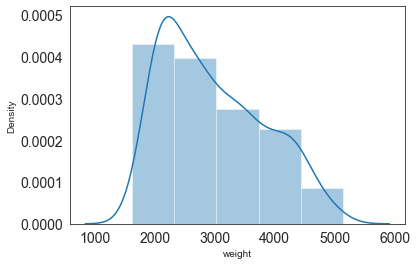

In [14]:
sns.distplot(cars.weight, bins=5);  

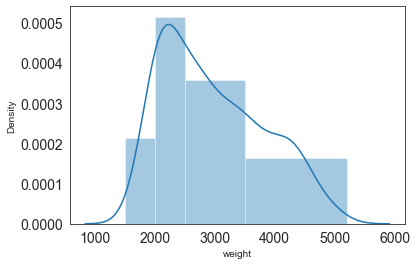

In [15]:
sns.distplot(cars.weight, bins=[1500, 2000, 2500, 3500, 5200]);

### Fit

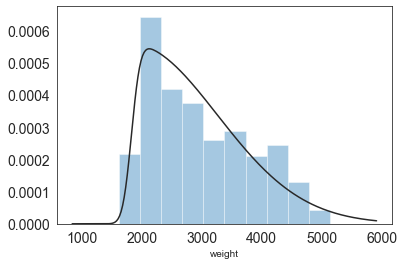

In [16]:
from scipy.stats import skewnorm

sns.distplot(cars.weight, fit=skewnorm, kde=False);

## Kwargs

### hist_kws

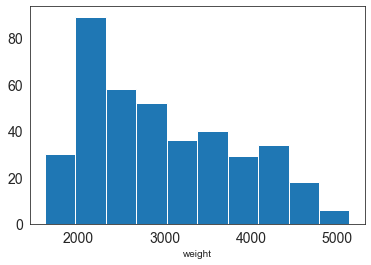

In [17]:
sns.distplot(cars.weight, kde=False, hist_kws={'alpha': 1});

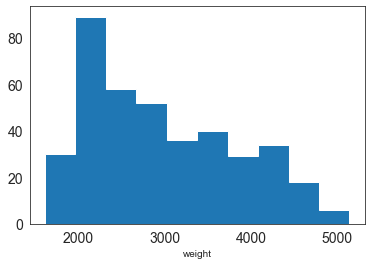

In [18]:
sns.distplot(cars.weight, kde=False, 
             hist_kws={'alpha': 1, 'histtype': 'stepfilled'});

### kde_kws

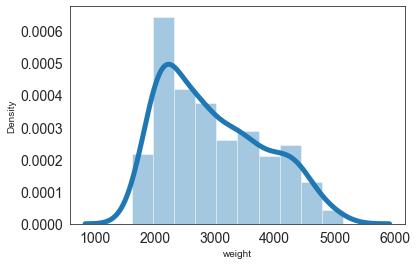

In [19]:
sns.distplot(cars.weight, kde_kws={'lw': 5});

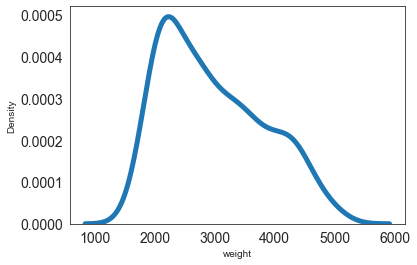

In [20]:
sns.kdeplot(cars.weight, lw=5);  

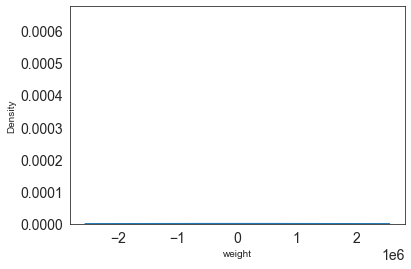

In [21]:
sns.distplot(cars.weight, kde_kws={'bw': 1000});

### rug_kws

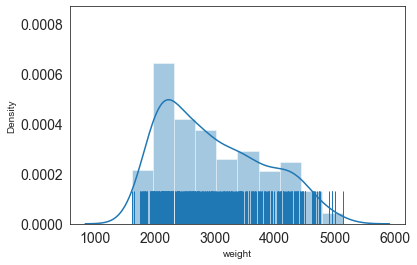

In [22]:
sns.distplot(cars.weight, rug=True, rug_kws={'height': 0.15});

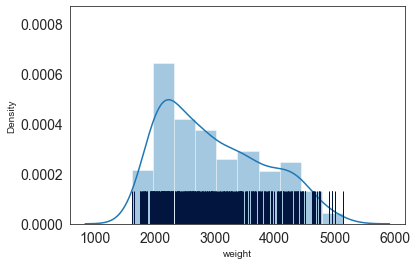

In [23]:
sns.distplot(cars.weight, rug=True, 
             rug_kws={'height': 0.15, 'color': 'xkcd:navy'});

## Styled Distplots

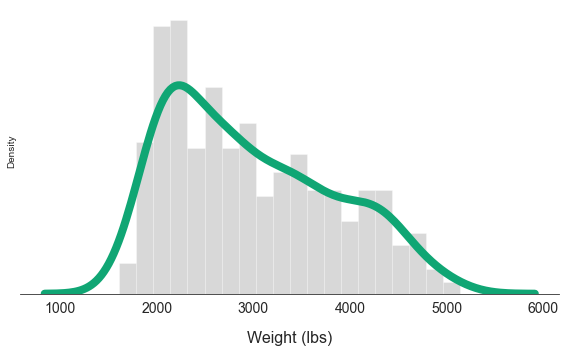

In [24]:
sns.set_style('white')

plt.figure(figsize=(8,5))
sns.distplot(cars.weight, 
             bins=20,
             kde_kws={"lw": 8, 'color':'xkcd:bluish green'},
             hist_kws={'alpha': 0.3, 'color':'gray'}
            )

sns.despine(left=True)
plt.xlabel('Weight (lbs)', fontsize=16, labelpad=15)
plt.yticks([])
plt.tight_layout()

plt.savefig('03dist_styleWeight_greenKDE.svg');

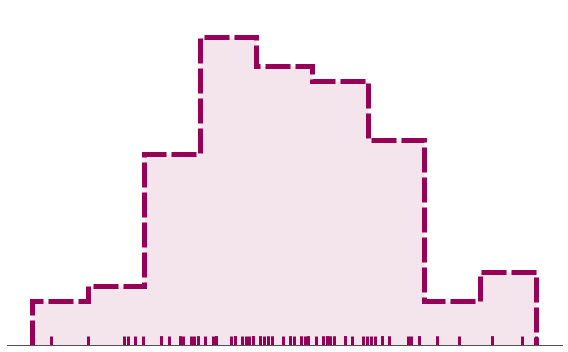

In [25]:
sns.set_style('white')

plt.figure(figsize=(8,5))
sns.distplot(cars.acceleration.sample(100, random_state=100), 
             rug=True,
             kde=False,
             hist_kws={'lw': 5, 
                       'linestyle': (0, (5, 1)),
                       'alpha': 1, 
                       'histtype':'step', 
                       'color':'xkcd:dark magenta'},
             rug_kws={'lw': 3,
                      'color':'xkcd:dark magenta'}
            )
sns.distplot(cars.acceleration.sample(100, random_state=100), 
             kde=False,
             hist_kws={'alpha': 0.1,
                       'histtype':'stepfilled', 
                       'color':'xkcd:dark magenta'},
            )

sns.despine(left=True)
plt.xlabel('')
plt.xticks([])
plt.yticks([])
plt.tight_layout()

plt.savefig('03dist_styleAcc_pink.svg');

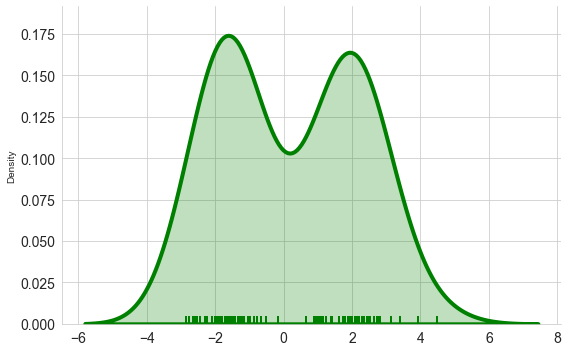

In [26]:
import random
random.seed(11)

data = [random.gauss(2, 0.75) for _ in range(50)]
data.extend([random.gauss(-2, 0.75) for _ in range(50)])

sns.set_style('whitegrid')

plt.figure(figsize=(8,5))
sns.distplot(data, 
             rug=True,
             hist=False, 
             color='green',
             kde_kws={'lw':4, 'shade':True, 'bw':.5},
             rug_kws={'lw':2}
            )

sns.despine()
plt.xlabel('')
plt.tight_layout()

#plt.savefig('03dist_styleRand_greenKDErug.svg');

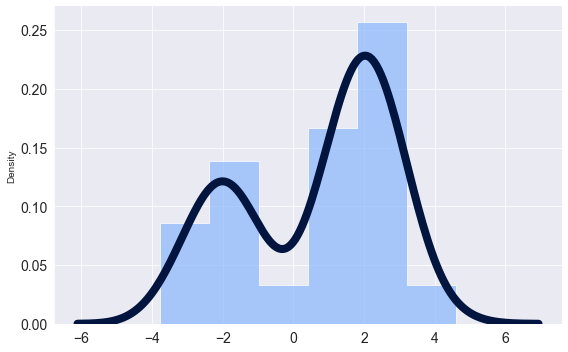

In [27]:
sns.set_style('darkgrid')

data = [random.gauss(2, 0.75) for _ in range(100)]
data.extend([random.gauss(-2, 0.75) for _ in range(50)])

plt.figure(figsize=(8,5))
sns.distplot(data, 
             hist_kws={'histtype': 'stepfilled', 
                       'alpha':0.7, 'color':'xkcd:carolina blue'},
             kde_kws={'lw':8,'color':'xkcd:navy'}
            )

sns.despine()
plt.xlabel('')
plt.tight_layout()

#plt.savefig('03dist_styleRand_carolina.svg');